In [ ]:
# Loading the necessary packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset and converting it into a dataframe called data.
data=pd.read_csv("/content/FIFA.csv")
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Offensive Work Rate,Defensive Work Rate,Position,Height(cm),Weight(kg),Release Clause,Kit Number
0,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000,190000,2305,Right,3,3,4,High,High,LCM,179,69,155000000,8
1,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000,46000,2303,Left,2,3,3,High,High,LB,172,69,97700000,19
2,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000,350000,2303,Right,4,5,4,High,High,RCM,181,70,198900000,17
3,N. Barella,25,Italy,86,89,Inter,89500000,110000,2296,Right,3,3,3,High,High,RCM,172,68,154400000,23
4,J. Kimmich,27,Germany,89,90,FC Bayern München,105500000,130000,2283,Right,4,4,3,High,Medium,RDM,177,75,182000000,6


In [ ]:
# Printing the dimensions of the dataset.
data.shape

(4892, 20)

In [ ]:
 # Dropping the the 'Special' and 'Kit Number' columns, as these columns are not important for our analysis. 
data.drop(['Special','Kit Number'],axis=1,inplace=True)
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Offensive Work Rate,Defensive Work Rate,Position,Height(cm),Weight(kg),Release Clause
0,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000,190000,Right,3,3,4,High,High,LCM,179,69,155000000
1,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000,46000,Left,2,3,3,High,High,LB,172,69,97700000
2,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000,350000,Right,4,5,4,High,High,RCM,181,70,198900000
3,N. Barella,25,Italy,86,89,Inter,89500000,110000,Right,3,3,3,High,High,RCM,172,68,154400000
4,J. Kimmich,27,Germany,89,90,FC Bayern München,105500000,130000,Right,4,4,3,High,Medium,RDM,177,75,182000000


In [ ]:
# Converting the 'Value' and 'Release Clause' column into millions and the 'Wage' column into thousands.
data['Value']=data['Value']/1000000
data['Release Clause']=data['Release Clause']/1000000
data['Wage']=data['Wage']/1000

In [ ]:
# Checking for null values.
data.isnull().any()

Name                        False
Age                         False
Nationality                 False
Overall                     False
Potential                   False
Club                        False
Value                       False
Wage                        False
Preferred Foot              False
International Reputation    False
Weak Foot                   False
Skill Moves                 False
Offensive Work Rate         False
Defensive Work Rate         False
Position                    False
Height(cm)                  False
Weight(kg)                  False
Release Clause              False
dtype: bool

In [ ]:
# Printing information about the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      4892 non-null   object 
 1   Age                       4892 non-null   int64  
 2   Nationality               4892 non-null   object 
 3   Overall                   4892 non-null   int64  
 4   Potential                 4892 non-null   int64  
 5   Club                      4892 non-null   object 
 6   Value                     4892 non-null   float64
 7   Wage                      4892 non-null   float64
 8   Preferred Foot            4892 non-null   object 
 9   International Reputation  4892 non-null   int64  
 10  Weak Foot                 4892 non-null   int64  
 11  Skill Moves               4892 non-null   int64  
 12  Offensive Work Rate       4892 non-null   object 
 13  Defensive Work Rate       4892 non-null   object 
 14  Position

In [ ]:
# Basic summary statistics.
data.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height(cm),Weight(kg),Release Clause
count,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000
mean,25.742232,69.194603,73.411079,5.942886,15.066251,1.209117,2.992232,2.516558,181.051922,75.150654,10.792265
std,4.478759,7.004347,6.591605,12.723465,29.924735,0.570715,0.690163,0.803751,6.980166,7.048739,24.548863
min,16.000000,47.000000,51.000000,0.000000,0.000000,1.000000,1.000000,1.000000,156.000000,49.000000,0.000000
25%,22.000000,64.000000,69.000000,0.775000,1.000000,1.000000,3.000000,2.000000,176.000000,70.000000,1.100000
50%,25.000000,69.000000,73.000000,1.700000,4.000000,1.000000,3.000000,2.000000,181.000000,75.000000,2.700000
75%,29.000000,74.000000,78.000000,4.500000,16.000000,1.000000,3.000000,3.000000,186.000000,80.000000,7.700000
max,44.000000,91.000000,95.000000,190.500000,450.000000,5.000000,5.000000,5.000000,206.000000,102.000000,366.700000


## Exploratory Data Analysis (EDA)

In [ ]:
data.nlargest(5,columns="Value")[["Name","Age","Club","Value"]]

,Name,Age,Club,Value
59,K. Mbappé,23,Paris Saint-Germain,190.5
126,E. Haaland,21,Manchester City,148.0
13,F. de Jong,25,FC Barcelona,116.5
151,Pedri,19,FC Barcelona,116.0
21,M. Salah,30,Liverpool,115.5


In [ ]:
data.nlargest(5,columns="Overall")[["Name","Age","Club","Overall"]]

,Name,Age,Club,Overall
2,K. De Bruyne,31,Manchester City,91
33,R. Lewandowski,33,FC Barcelona,91
45,L. Messi,35,Paris Saint-Germain,91
59,K. Mbappé,23,Paris Saint-Germain,91
95,K. Benzema,34,Real Madrid CF,91


In [ ]:
pd.DataFrame(data.groupby("Position").Value.mean().sort_values(ascending=False)).head()

,Value
Position,
CF,16.990909
RAM,14.750000
RF,9.752500
LW,9.375034
RW,8.916857


In [ ]:
data[["Age","Height(cm)","Weight(kg)"]].describe()

,Age,Height(cm),Weight(kg)
count,4892.000000,4892.000000,4892.000000
mean,25.742232,181.051922,75.150654
std,4.478759,6.980166,7.048739
min,16.000000,156.000000,49.000000
25%,22.000000,176.000000,70.000000
50%,25.000000,181.000000,75.000000
75%,29.000000,186.000000,80.000000
max,44.000000,206.000000,102.000000


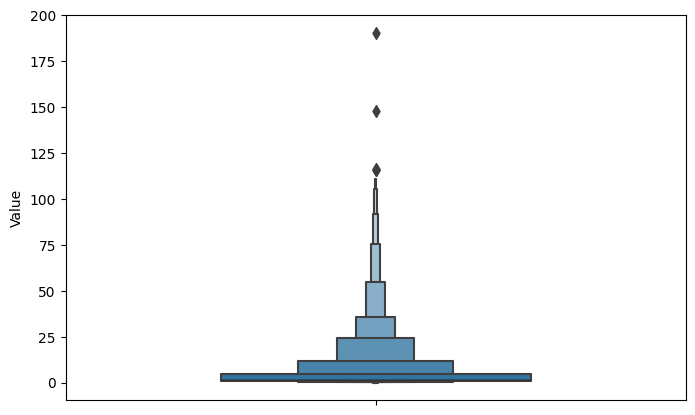

In [ ]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=data, width=0.5)
plt.show()

<Axes: xlabel='Value', ylabel='Density'>

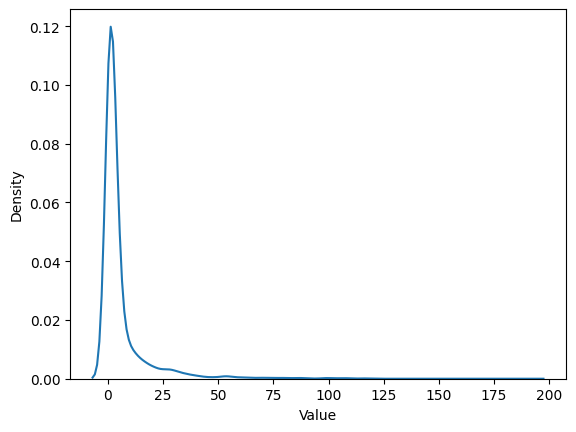

In [ ]:
sns.kdeplot(data.Value)

<Axes: xlabel='Overall', ylabel='Value'>

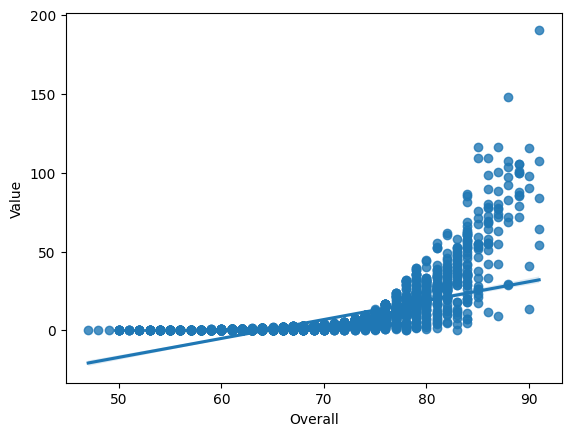

In [ ]:
sns.regplot(x="Overall",y="Value",data=data)

In [ ]:
# Unique player positions.
data['Position'].unique()

array(['LCM', 'LB', 'RCM', 'RDM', 'LCB', 'RS', 'RB', 'LM', 'LS', 'RWB',
       'CDM', 'RW', 'RM', 'LF', 'LWB', 'ST', 'CAM', 'LDM', 'LW', 'CF',
       'RF', 'RCB', 'CM', 'CB', 'RAM', 'LAM', 'GK'], dtype=object)

In [ ]:
# Total number of player positions.
len(data['Position'].unique())

27

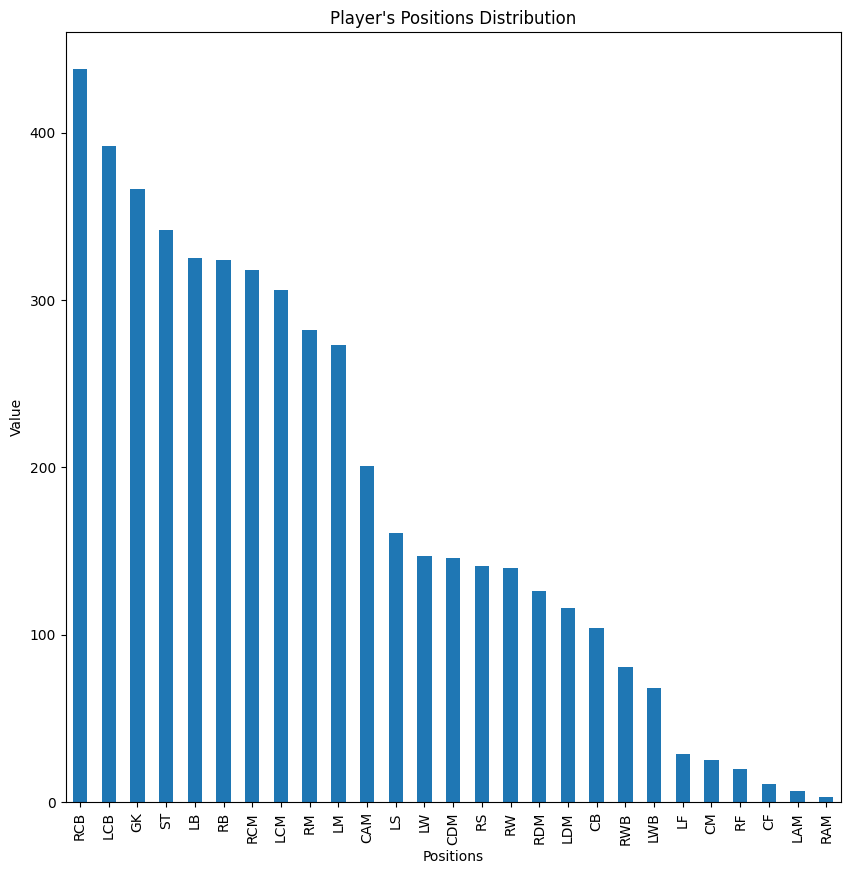

In [ ]:
# Bar plot for Positions vs Value of players.
plt.figure(figsize=(10,10))
loc=data.Position.value_counts()
loc.plot(kind='bar')
plt.title("Player's Positions Distribution")
plt.xlabel('Positions')
plt.ylabel('Value')
plt.show()

<Figure size 2000x2000 with 0 Axes>

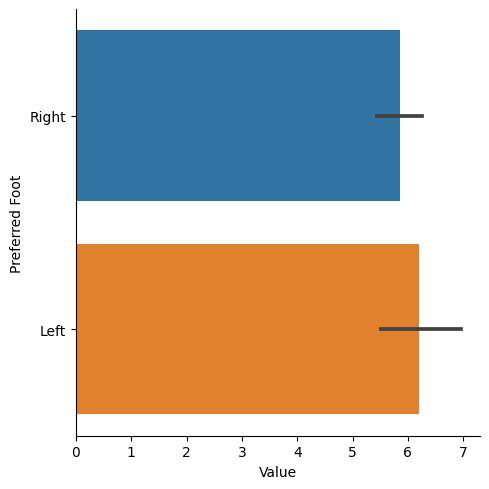

In [ ]:
# Cat plot for Preferred Foot vs Value.
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Preferred Foot", x="Value", kind="bar",  data=data)
plt.show()

<ipython-input-22-72b83ce9141d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


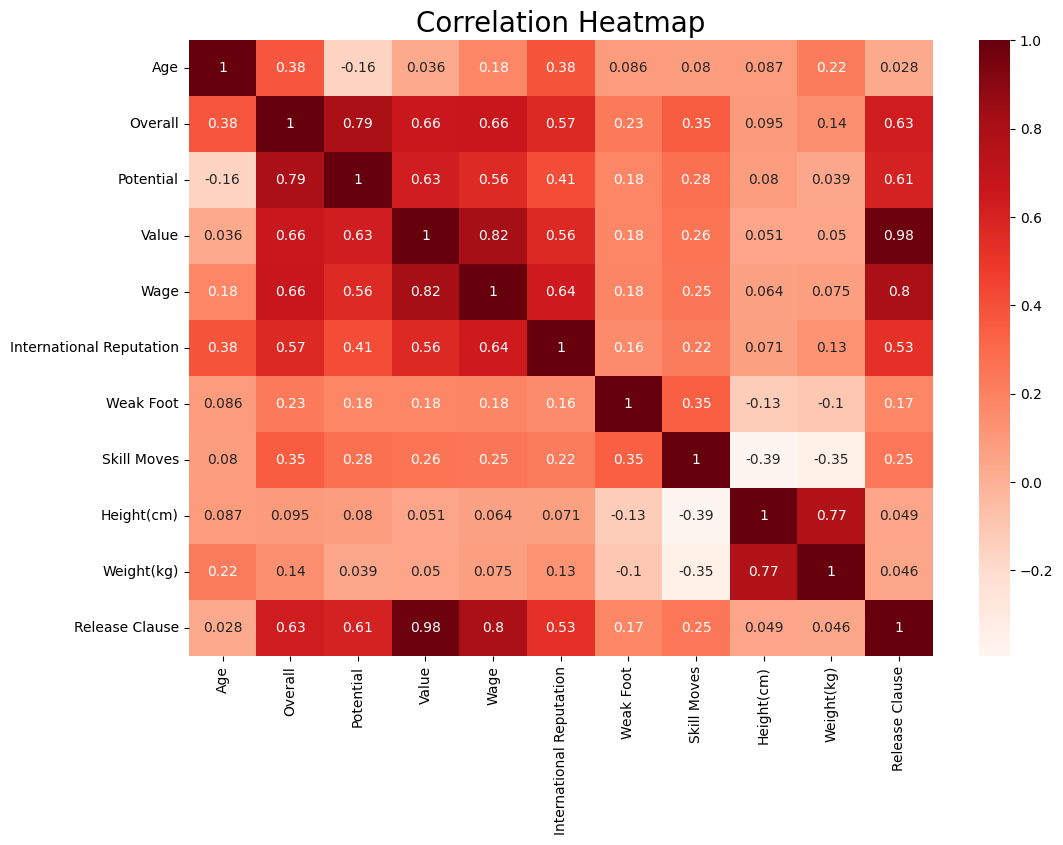

In [ ]:
# Correlation Matrix.
corr_mat = data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_mat,annot = True, cmap = "Reds")
plt.title("Correlation Heatmap", fontsize = 20);

In [ ]:
pd.DataFrame(corr_mat["Value"]).sort_values("Value",ascending=False).head(10)

,Value
Value,1.000000
Release Clause,0.980684
Wage,0.824957
Overall,0.659361
Potential,0.627573
International Reputation,0.564687
Skill Moves,0.259173
Weak Foot,0.181913
Height(cm),0.051209
Weight(kg),0.050237


Text(0, 0.5, 'Value')

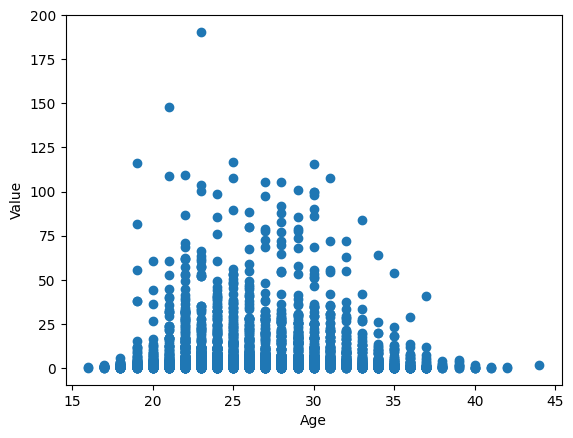

In [ ]:
# Plot for Value vs Age.
plt.scatter(data['Age'],data['Value'])
plt.xlabel('Age')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

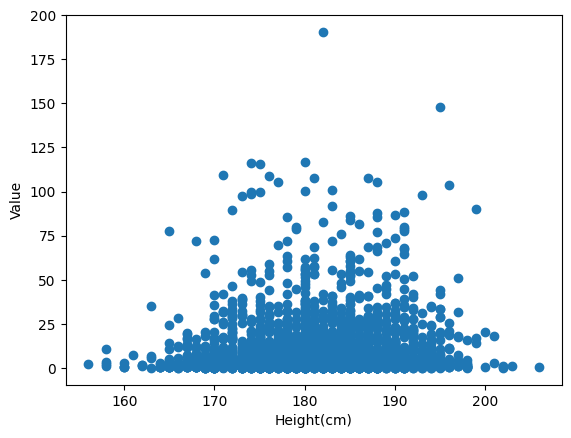

In [ ]:
# Plot for Value vs Height(cm).
plt.scatter(data['Height(cm)'],data['Value'])
plt.xlabel('Height(cm)')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

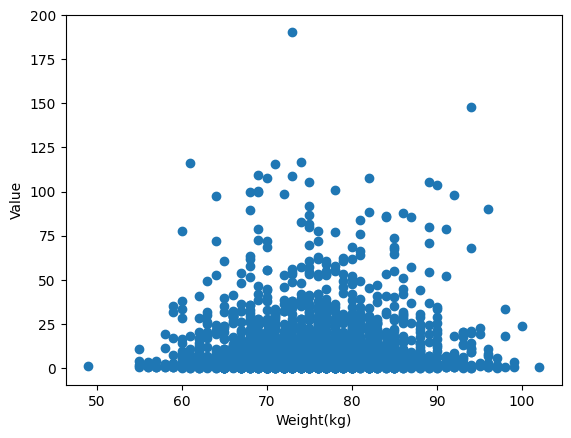

In [ ]:
# Plot for Value vs Weight(kg).
plt.scatter(data['Weight(kg)'],data['Value'])
plt.xlabel('Weight(kg)')
plt.ylabel('Value')

In [ ]:
# Loading the necessary packages for modeling.
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      4892 non-null   object 
 1   Age                       4892 non-null   int64  
 2   Nationality               4892 non-null   object 
 3   Overall                   4892 non-null   int64  
 4   Potential                 4892 non-null   int64  
 5   Club                      4892 non-null   object 
 6   Value                     4892 non-null   float64
 7   Wage                      4892 non-null   float64
 8   Preferred Foot            4892 non-null   object 
 9   International Reputation  4892 non-null   int64  
 10  Weak Foot                 4892 non-null   int64  
 11  Skill Moves               4892 non-null   int64  
 12  Offensive Work Rate       4892 non-null   object 
 13  Defensive Work Rate       4892 non-null   object 
 14  Position

In [ ]:
data['Offensive Work Rate'] = data['Offensive Work Rate'].replace(["Low","Medium","High"], [0,1,2])
data['Defensive Work Rate'] = data['Defensive Work Rate'].replace(["Low","Medium","High"], [0,1,2])

In [ ]:
X= data.drop(columns=["Value","Name"])
y= data.loc[:,"Value"]

In [ ]:
X = pd.get_dummies(X, prefix = X.select_dtypes("object").columns,drop_first=True)
X.head()

,Age,Overall,Potential,Wage,International Reputation,Weak Foot,Skill Moves,Offensive Work Rate,Defensive Work Rate,Height(cm),...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,27,86,87,190.0,3,3,4,2,2,179,...,0,0,0,0,0,0,0,0,0,0
1,30,85,85,46.0,2,3,3,2,2,172,...,0,0,0,0,0,0,0,0,0,0
2,31,91,91,350.0,4,5,4,2,2,181,...,0,0,1,0,0,0,0,0,0,0
3,25,86,89,110.0,3,3,3,2,2,172,...,0,0,1,0,0,0,0,0,0,0
4,27,89,90,130.0,4,4,3,2,1,177,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
cv_model = ElasticNetCV(cv = 10).fit(X_train,y_train)

In [ ]:
cv_model.alpha_

0.025197437188807754

In [ ]:
models = {}
for i in range(21):
  models[i] = ElasticNet(alpha = cv_model.alpha_,l1_ratio=i/20).fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.052e+03, tolerance: 5.979e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
mse={}
r2={}
for i in range(21):
  y_pred = models[i].predict(X_test)
  mse[i] = np.sqrt(mean_squared_error(y_test,y_pred))
  r2[i] = r2_score(y_test,y_pred)

In [ ]:
alp=list(np.arange (0, 1.05, 0.05))
d={'alpha': alp,
        'mse': list(mse.values()), 'r2':list(r2.values())}

Text(0, 0.5, 'MSE')

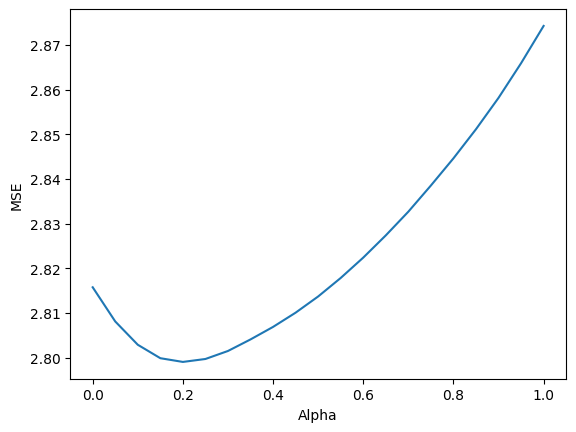

In [ ]:
# Plot for MSE vS Alpha values.
plt.plot(d['alpha'], d['mse'])
plt.xlabel('Alpha')
plt.ylabel('MSE')

Text(0, 0.5, 'R2')

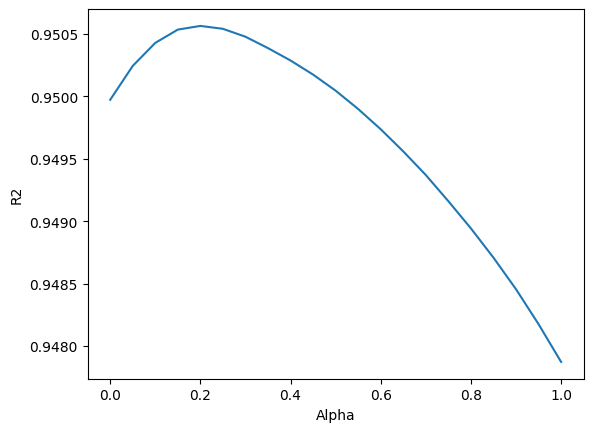

In [ ]:
# Plot for R2 vs Alpha values.
plt.plot(d['alpha'], d['r2'])
plt.xlabel('Alpha')
plt.ylabel('R2')

In [ ]:
pd.DataFrame(d)

,alpha,mse,r2
0,0.00,2.815777,0.949973
1,0.05,2.808127,0.950244
2,0.10,2.802914,0.950429
3,0.15,2.799905,0.950535
4,0.20,2.799073,0.950564
5,0.25,2.799729,0.950541
6,0.30,2.801523,0.950478
7,0.35,2.804108,0.950386
8,0.40,2.806908,0.950287
9,0.45,2.810093,0.950174


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=75)
RFR.fit(X_train,y_train)
RFR.score(X_train,y_train)
rfr_pred=RFR.predict(X_test)

In [ ]:
mse_rfr = np.sqrt(mean_squared_error(y_test,rfr_pred))
print('MSE for Random Forest is', mse_rfr)
r2_rfr = r2_score(y_test,rfr_pred)
print('r2 for Random Forest is', r2_rfr)

MSE for Random Forest is 1.7327727357718758
r2 for Random Forest is 0.9810550076680336


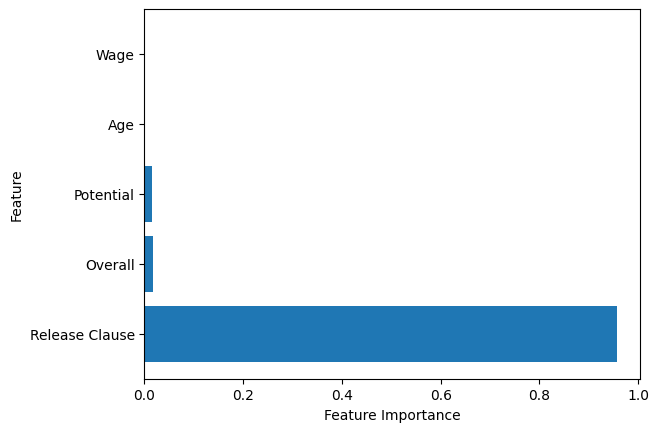

In [ ]:
importances = RFR.feature_importances_
feature_importances = dict(zip(X.columns, importances))

# Sort the dictionary by importance score
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)


# Extract the top 10 features
top_features = dict(sorted_feature_importances[:5])

# Plot the top 10 features
plt.barh(range(len(top_features)), list(top_features.values()), align='center')
plt.yticks(range(len(top_features)), list(top_features.keys()))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
Xnew=sc.transform(X)

In [ ]:
y_pred = RFR.predict(Xnew)
a=pd.DataFrame({'Name':data.Name,'Actual': y, 'Predicted': y_pred})
a["Difference"] = (a["Actual"]-a["Predicted"]) 
a_under = round(a.sort_values('Difference').set_index('Name').head(10),2)
a_over = round(a.sort_values('Difference').set_index('Name').tail(10),2)

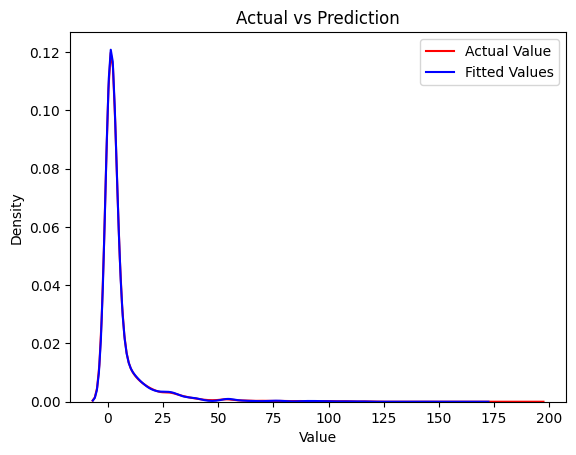

In [ ]:
# Plot for actual vs predicted values.
ax1 = sns.kdeplot(y,  color="r", label="Actual Value")
sns.kdeplot(y_pred,  color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Prediction')
plt.legend()
plt.show()
plt.close()

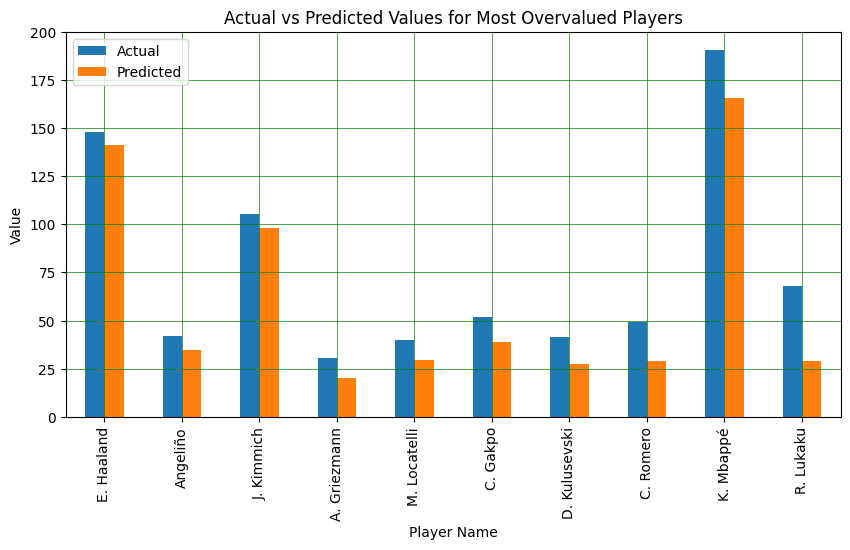

In [ ]:
# Plot for actual vs predicted values for under predicted players.
a_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Most Overvalued Players")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

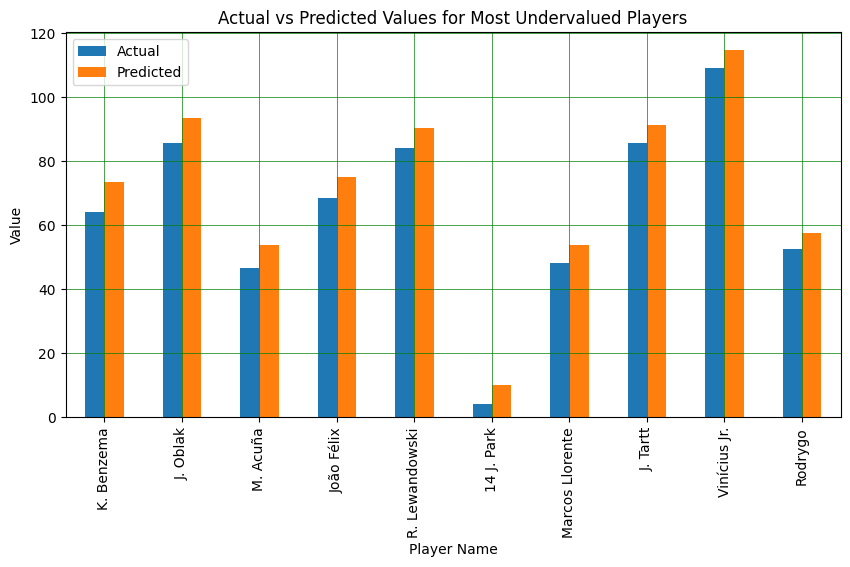

In [ ]:
# Plot for actual vs predicted values for over predicted players.
a_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Most Undervalued Players")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

In [ ]:
# Actual, predicted values and difference of over predicted players.
a_over

,Actual,Predicted,Difference
Name,,,
E. Haaland,148.0,141.35,6.65
Angeliño,42.0,34.86,7.14
J. Kimmich,105.5,98.20,7.30
A. Griezmann,30.5,20.34,10.16
M. Locatelli,40.0,29.63,10.37
C. Gakpo,52.0,38.79,13.21
D. Kulusevski,41.5,27.37,14.13
C. Romero,49.5,29.00,20.50
K. Mbappé,190.5,165.63,24.87


In [ ]:
# Actual, predicted values and difference of under predicted players.
a_under

,Actual,Predicted,Difference
Name,,,
K. Benzema,64.0,73.34,-9.34
J. Oblak,85.5,93.42,-7.92
M. Acuña,46.5,53.63,-7.13
João Félix,68.5,75.10,-6.60
R. Lewandowski,84.0,90.29,-6.29
14 J. Park,4.1,10.09,-5.99
Marcos Llorente,48.0,53.89,-5.89
J. Tartt,85.5,91.35,-5.85
Vinícius Jr.,109.0,114.54,-5.54
